# Unsupervised Learning : Mini-project 2

TEAM Details:

<b>Group ID</b> - 13 <br>

<b>Group Members</b>:<br>
2020AIML030 - Karunya DS <br>
2020AIML069 - Samtani Edwin<br>
2020AIML022 - Apoorva ventra<br>

Medicine Dataset. The dataset is a CSV file with each row containing a tweet.

Tasks: 

#### Data Preprocessing  [4 points]
1. Read the text data from the csv file
2. Convert the variable into corresponding feature vectors as below. Perform pre-processing step of stopword removal , special character removal , converting the text to the lower case , remove Url’s if any  from text.  [1 pt]
3. For each title text, convert it into corresponding TF-IDF vector. [1 pt]
4. TF-IDF vectors are sparse and of large dimension. Reduce them into only 2 dimensions using PCA. [2 pt]

#### Perform K-means clustering for different values of K (2,3,4) and evaluate the quality of clustering using Silhouette score. [4 points]
1. For each value of K, plot clusters (all cluster points in same cluster with same color, cluster points in different cluster in different colors). [2 pt]
2. Draw a bar graph with X-axis as K value and Y-axis as silhouette score. [1 pt]
3. Explain (1-2 lines) which is the best clustering and why. [1 pt]

#### Consider the pre-processed text of all the sentences and find words that frequently occur together. [4 points]
1. More specifically, find association rules of minimum length 2 with 20% confidence and 10% support. Other parameters you are free to decide on your own. How many such rules are there? List all the rules. Interpret any one rule. [2 pt]
2. Draw a line graph with Y-axis as number of association rules of minimum length 2, and X-axis as confidence percentage (ranging from 0%, 10%, 20%, ...., 100%). Plot different colored lines for different support percentage (take values as 10%, 20%, and 50%) [2 pt]

## Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from array import array
from nltk.corpus import stopwords
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import sklearn.metrics as metrics
%matplotlib inline
nltk.download('punkt')
nltk.download('stopwords')


import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None

[nltk_data] Downloading package punkt to /Users/k0d0132/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/k0d0132/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Load Dataset

In [3]:
data_df = pd.read_csv('problem_statement_4.csv', encoding = 'unicode_escape')

## Get dimensionality of the data

In [4]:
print("Number of Records : {} \nNumber of columns : {}".format(data_df.shape[0], data_df.shape[1]))

Number of Records : 9470 
Number of columns : 1


## Overview of data

In [5]:
data_df.head(10)

,headline
0,$MMM fell on hard times but could be set to re...
1,Wolfe Research Upgrades 3M $MMM to Á¤Peer Perf...
2,3M $MMM Upgraded to Á¤Peer PerformÁ¬ by Wolfe ...
3,$MMM #insideday follow up as it also opened up...
4,$MMM is best #dividend #stock out there and do...
5,$MMM - 3M: The Fallen Dividend King Will Be Ba...
6,$MMMcelebrates New Year with 7 month high clos...
7,$MMM above 180 baby is going higher
8,"$MMMhasn't really done much this year, but it ..."
9,3M $MMM Rating Increased to Neutral at JPMorga...


## 1. Data Preprocessing

#### Removing stop words

In [6]:

stop = stopwords.words('english')

In [7]:
data_df['headline_without_stopwords'] = data_df['headline'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data_df.head(3)


,headline,headline_without_stopwords
0,$MMM fell on hard times but could be set to re...,$MMM fell hard times could set rebound soon.
1,Wolfe Research Upgrades 3M $MMM to Á¤Peer Perf...,Wolfe Research Upgrades 3M $MMM Á¤Peer PerformÁ¬
2,3M $MMM Upgraded to Á¤Peer PerformÁ¬ by Wolfe ...,3M $MMM Upgraded Á¤Peer PerformÁ¬ Wolfe Resear...


#### Removing special characters 

In [9]:
data_df['headline_without_spl_char'] = data_df['headline_without_stopwords'].map(lambda x: re.sub(r'[^a-zA-Z0-9 ]', ' ', x))
data_df['headline_without_spl_char'] = data_df['headline_without_spl_char'].apply(lambda x : x.replace("_", " "))
data_df.head(3)

,headline,headline_without_stopwords,headline_without_spl_char
0,$MMM fell on hard times but could be set to re...,$MMM fell hard times could set rebound soon.,MMM fell hard times could set rebound soon
1,Wolfe Research Upgrades 3M $MMM to Á¤Peer Perf...,Wolfe Research Upgrades 3M $MMM Á¤Peer PerformÁ¬,Wolfe Research Upgrades 3M MMM Peer Perform
2,3M $MMM Upgraded to Á¤Peer PerformÁ¬ by Wolfe ...,3M $MMM Upgraded Á¤Peer PerformÁ¬ Wolfe Resear...,3M MMM Upgraded Peer Perform Wolfe Resear...


#### Converting the text to the lower case

In [10]:
data_df['headline_lowercase'] = data_df['headline_without_spl_char'].apply(lambda x : x.lower())
data_df.head(3)

,headline,headline_without_stopwords,headline_without_spl_char,headline_lower
0,$MMM fell on hard times but could be set to re...,$MMM fell hard times could set rebound soon.,MMM fell hard times could set rebound soon,mmm fell hard times could set rebound soon
1,Wolfe Research Upgrades 3M $MMM to Á¤Peer Perf...,Wolfe Research Upgrades 3M $MMM Á¤Peer PerformÁ¬,Wolfe Research Upgrades 3M MMM Peer Perform,wolfe research upgrades 3m mmm peer perform
2,3M $MMM Upgraded to Á¤Peer PerformÁ¬ by Wolfe ...,3M $MMM Upgraded Á¤Peer PerformÁ¬ Wolfe Resear...,3M MMM Upgraded Peer Perform Wolfe Resear...,3m mmm upgraded peer perform wolfe resear...


#### Removing URLS if any

In [11]:
data_df['headline_without_url'] = data_df['headline_lower'].apply(lambda x : re.sub(r'http\S+','', x))
data_df.head(3)

,headline,headline_without_stopwords,headline_without_spl_char,headline_lower,headline_without_url
0,$MMM fell on hard times but could be set to re...,$MMM fell hard times could set rebound soon.,MMM fell hard times could set rebound soon,mmm fell hard times could set rebound soon,mmm fell hard times could set rebound soon
1,Wolfe Research Upgrades 3M $MMM to Á¤Peer Perf...,Wolfe Research Upgrades 3M $MMM Á¤Peer PerformÁ¬,Wolfe Research Upgrades 3M MMM Peer Perform,wolfe research upgrades 3m mmm peer perform,wolfe research upgrades 3m mmm peer perform
2,3M $MMM Upgraded to Á¤Peer PerformÁ¬ by Wolfe ...,3M $MMM Upgraded Á¤Peer PerformÁ¬ Wolfe Resear...,3M MMM Upgraded Peer Perform Wolfe Resear...,3m mmm upgraded peer perform wolfe resear...,3m mmm upgraded peer perform wolfe resear...


In [12]:
##Taking only required column in a new dataframe object

clean_df = pd.DataFrame()
clean_df['headline'] = data_df['headline_without_url']

### Creating TF-IDF Vector

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer() #Can add some more parameters of accuracy is not as required 

In [14]:
x = v.fit_transform(clean_df['headline'])

In [15]:
vector_df = pd.DataFrame(x.toarray(), columns=v.get_feature_names())
vector_df

,00,000,0014,0015,0017,0028,003,0063,0074,008,...,znga,zon,zone,zoom,zooms,zpr,zs,zts,zuora,zyxi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###### Signifies that there are 9458 terms that are unique in the dataset

### Reducing 9458 dimensions to 2 using PCA

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x.toarray())
principalComponents

array([[-0.03205771, -0.04266534],
       [-0.02560682, -0.04698208],
       [-0.00796059, -0.02131309],
       ...,
       [-0.01399659, -0.01342869],
       [-0.01510554, -0.03961183],
       [-0.01544735, -0.03948403]])

In [20]:
pca_df = pd.DataFrame(principalComponents)
pca_df

,0,1
0,-0.032058,-0.042665
1,-0.025607,-0.046982
2,-0.007961,-0.021313
3,-0.037300,-0.051321
4,-0.056278,-0.003342
...,...,...
9465,-0.016473,-0.047299
9466,0.011396,0.037127
9467,-0.013997,-0.013429
9468,-0.015106,-0.039612


## 2. K-means clustering for different values of K

In [21]:
def perform_kmeans(k,df):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=15,random_state=1,max_iter=200,verbose=0)
    kmeans.fit(df)
    label = kmeans.fit_predict(df)
    centers = np.array(kmeans.cluster_centers_)
    LABEL_COLOR_MAP = {0:'r', 1:'g', 2:'b', 3:'y'}
    label_color = [LABEL_COLOR_MAP[l] for l in label]
    plt.scatter(pca_df[0], pca_df[1], c=label_color)
    for i in range(0,k):
            plt.scatter(centers[i][0],centers[i][1], marker="o", color='k', s=200)
    print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df, kmeans.labels_))

#### K-Means with k = 2

Silhouette Coefficient: 0.694


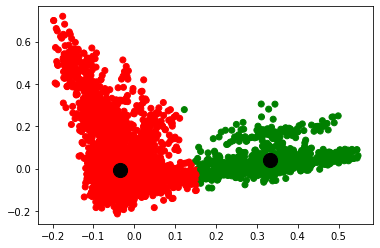

In [22]:
perform_kmeans(2,pca_df)

#### K-Means with k = 3

Silhouette Coefficient: 0.724


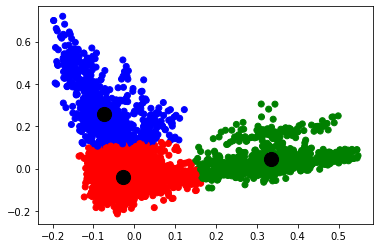

In [23]:
perform_kmeans(3,pca_df)

#### K-Means with k = 4

Silhouette Coefficient: 0.657


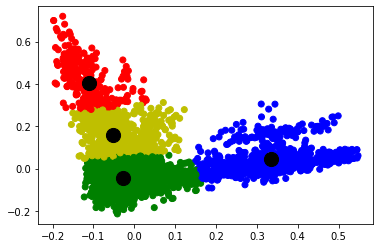

In [24]:
perform_kmeans(4,pca_df)

### Silhouette score plot with different k values

In [34]:
silhouette_coefficients = []
for k in range(2,8):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=15,random_state=1,max_iter=200,verbose=0)
    kmeans.fit(pca_df)
    score = silhouette_score(pca_df, kmeans.labels_)
    silhouette_coefficients.append(score)

In [35]:
silhouette_coefficients

[0.6939430732086862,
 0.7236942761771443,
 0.6569396936825872,
 0.5821760288888798,
 0.5109649461369271,
 0.4878940902903766]

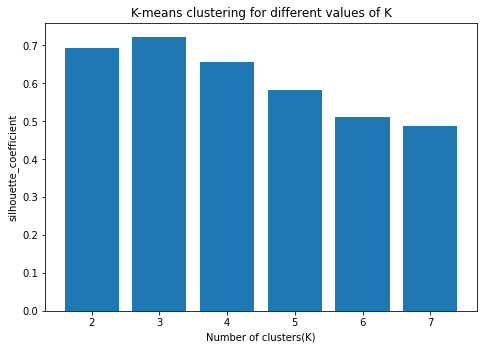

In [38]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
num_of_clusters = ["2","3","4","5","6","7"]
ax.bar(num_of_clusters, silhouette_coefficients)
ax.set_xlabel('Number of clusters(K)')
ax.set_ylabel('silhouette_coefficient')
ax.set_title('K-means clustering for different values of K')
plt.show()

### Best clustering

##### Conclusion : 
The cluster with <b>K=3 (3 clusters)</b> is the best in this case as the <b>silhouette score is high (0.723)</b> when compared to other clusters (different values of K)<br/> 

# 3. Association rule Mining - Apriori algorithm
##### To find words that frequently occur together
<br/>

In [40]:
clean_df

,headline
0,mmm fell hard times could set rebound soon
1,wolfe research upgrades 3m mmm peer perform
2,3m mmm upgraded peer perform wolfe resear...
3,mmm insideday follow also opened nice candle...
4,mmm best dividend stock 40 2019 xli go go...
...,...
9465,wmt walmart shifts remodeling vs new stores
9466,walmart inc wmt holder texas permanent school...
9467,wmt gild 3 dividend stocks perfect retirees
9468,walmart expanding use robots scan shelves so...


### Data transformation

In [52]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

clean_df['tokenized_sents'] = clean_df['headline'].apply(lambda x: nltk.word_tokenize(x))

te = TransactionEncoder()
te_ary = te.fit(clean_df['tokenized_sents']).transform(clean_df['tokenized_sents'])
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,0,00,000,0014,0015,0017,0028,003,0063,0074,...,znga,zon,zone,zoom,zooms,zpr,zs,zts,zuora,zyxi
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Generating Frequent Itemsets

#### Items and itemsets with at least 10% support

In [60]:
frequent_itemsets_min_sup_10 = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets_min_sup_10['length'] = frequent_itemsets_min_sup_10['itemsets'].apply(lambda x: len(x))
#frequent_itemsets.drop(frequent_itemsets[frequent_itemsets['length'] < 2].index, inplace = True)
frequent_itemsets_min_sup_10

,support,itemsets,length
0,0.120275,(co),1
1,0.189124,(k),1
2,0.108765,(shares),1
3,0.127878,(stock),1
4,0.158395,(stocks),1


#### Items and itemsets with at least 5% support

In [74]:
frequent_itemsets_min_sup_5 = apriori(df, min_support=0.05, use_colnames=True)
frequent_itemsets_min_sup_5['length'] = frequent_itemsets_min_sup_5['itemsets'].apply(lambda x: len(x))
#frequent_itemsets.drop(frequent_itemsets[frequent_itemsets['length'] < 2].index, inplace = True)
frequent_itemsets_min_sup_5

,support,itemsets,length
0,0.052482,(0),1
1,0.099578,(00),1
2,0.067899,(1),1
3,0.055861,(buy),1
4,0.120275,(co),1
5,0.056600,(dividend),1
6,0.097888,(earnings),1
7,0.057867,(eps),1
8,0.057445,(group),1
9,0.052798,(high),1


### Generating Association Rules from Frequent Itemsets

#### Association rules of minimum length 2 with 20% confidence and 5% support

In [73]:
rules = association_rules(frequent_itemsets_min_sup_5, metric="confidence", min_threshold=0.2)
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules["confidence"] = rules["confidence"] *100
rules["support"] = rules["support"] *100
rules[ (rules['antecedent_len'] >= 2) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
10,"(00, target)",(price),0.058184,0.080253,5.659979,97.277677,12.121311,0.051930,33.785357,2
11,"(00, price)",(target),0.056917,0.072228,5.659979,99.443414,13.767970,0.052489,166.689687,2
12,"(target, price)",(00),0.064097,0.099578,5.659979,88.303130,8.867769,0.050217,7.697977,2


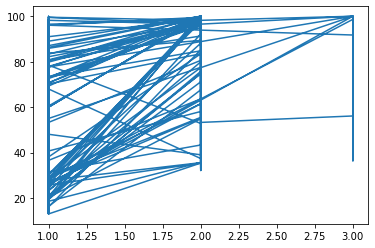

In [61]:
   plt.plot(rules["antecedent_len"],rules["confidence"])

  Country     Month  GDPA
0     USA   January     5
1     USA  February    10
2     USA     March     5
3  Canada   January     7
4  Canada  February     4
5  Canada     March    10
6  Mexico   January     9
7  Mexico  February    17
8  Mexico     March     8


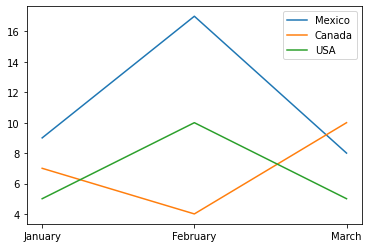

In [50]:
d = {'Country': ['USA', 'USA', 'USA', 'Canada', 'Canada', 'Canada', 'Mexico', 'Mexico', 'Mexico'],
     'Month': ['January', 'February', 'March', 'January', 'February', 'March', 'January', 'February', 'March'],
     'GDPA': [5, 10, 5, 7, 4, 10, 9, 17, 8]}
df = pd.DataFrame(data=d)
print(df)

country_set = set(df['Country'])

plt.figure()
for country in country_set:
     selected_data = df.loc[df['Country'] == country]
     plt.plot(selected_data['Month'], selected_data['GDPA'], label=country)
     
plt.legend()
plt.show()